In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [4]:
#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [5]:
#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [6]:
train_tweets = pd.read_csv('train_tweets.csv')
test_tweets = pd.read_csv('test_tweets.csv')

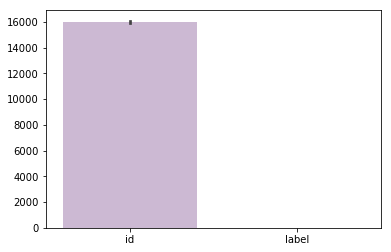

In [7]:
sns.barplot(data = train_tweets,palette='PRGn')

In [25]:
list="A bot working with a boy in bombay and when in washington they go to boston"

In [26]:
re.findall(r'\bb\w+', list)

['bot', 'boy', 'bombay', 'boston']

In [93]:
text= """ Srivastavas ! are a     $community originating in the eastern The RQA Alternatives team is seeking a candidate with risk management experience, with an emphasis on illiquid private credit, to support risk management efforts of our ~$24b Global Private Credit platform. Responsibilities include, but are not limited to, daily risk management and oversight and contribution to long term, strategic projects to enhance risk and portfolio management processes.
Partner with investment teams and businesses to ensure that risks are fully understood, consistent with client objectives and constraints, and appropriately mitigated.
Apply quantitative techniques to real-world problems including analyzing portfolio risk taking and understanding financial markets
Work with senior risk managers to promote rigorous governance and oversight environment to responsibly invest client capital.
Interact regularly with $investment teams to $understand trends and evolving risks within the portfolios and develop appropriate responses.
Explain complex ideas in simple but impactful terms in order to influence portfolio construction decisions
Perform market analysis and conduct portfolio reviews alongside senior risk managers and the investment teams to ensure a thorough evaluation of portfolio risk.
Review portfolio and business performance against objectives and $relative to benchmarks or comparable peers. Employ a creative approach to risk management, modeling and scenario analysis.
Review new investment memos, posing thoughtful questions and constructively challenging all new investments.
Work with senior risk managers and investment team to design and implement appropriate analytical tools and reports to effectively monitor risk, communicate changes in risk appetite, and enhance decision making.
Perform ad-hoc reporting and analyses to help address the real-time asks of senior members of the team.
"""


In [94]:
list1=text.split()

In [97]:
list2=re.split(" ",text)

In [98]:
print(list2)

['', 'Srivastavas', '!', 'are', 'a', '', '', '', '', '$community', 'originating', 'in', 'the', 'eastern', 'The', 'RQA', 'Alternatives', 'team', 'is', 'seeking', 'a', 'candidate', 'with', 'risk', 'management', 'experience,', 'with', 'an', 'emphasis', 'on', 'illiquid', 'private', 'credit,', 'to', 'support', 'risk', 'management', 'efforts', 'of', 'our', '~$24b', 'Global', 'Private', 'Credit', 'platform.', 'Responsibilities', 'include,', 'but', 'are', 'not', 'limited', 'to,', 'daily', 'risk', 'management', 'and', 'oversight', 'and', 'contribution', 'to', 'long', 'term,', 'strategic', 'projects', 'to', 'enhance', 'risk', 'and', 'portfolio', 'management', 'processes.\nPartner', 'with', 'investment', 'teams', 'and', 'businesses', 'to', 'ensure', 'that', 'risks', 'are', 'fully', 'understood,', 'consistent', 'with', 'client', 'objectives', 'and', 'constraints,', 'and', 'appropriately', 'mitigated.\nApply', 'quantitative', 'techniques', 'to', 'real-world', 'problems', 'including', 'analyzing', '

In [92]:
from string import ascii_lowercase
d = dict.fromkeys(ascii_lowercase,0)   #The fromkeys() method creates a new dictionary from the given sequence of elements with a value provided by the user
print(d)

{'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 0, 'z': 0}


In [ ]:
for item in list1:
    d[item[0]] += 1
print (d)

In [62]:
tt=re.search("por", text)

In [41]:
print(tt)

<re.Match object; span=(189, 192), match='por'>


In [42]:
pp=re.match("por", text)

In [43]:
print(pp)

None


In [44]:
cc=re.findall('$', text)

In [45]:
cc

['', '']

In [105]:
text= """"
chart- @TrendSpider 
https://t.co/OOyhsI1iTT RT @ronwichgers: $BBBY Check out this chart I made with @TrendSpider https://t.co/BhbXYB3ZtG 
I really like the educational mail from @tra… @Mr_MoonStocks @tradingview LOL, you're welcome man!! -Jake RT @BullishJason: $ZM @TrendSpider 
Rejected the entry into the gap and is not underneath falling back towards demand
Needs to bounce off… RT @BulldawgCharts: $SPY are we rhyming two weeks later? $QQQ 
#SPY #QQQ @TrendSpider https://t.co/fkLagXtMgA RT @WVinvest1: $INSG  holding the 1 hour trend line  💪
Check out this chart I made with @TrendSpider https://t.co/CXAoAviqtu @nebraskangooner Looking forward
to it man! -Jake RT @KaladinTD: $SPY Daily
Holding support for the time being, this latest run up over the last 7 days was on pretty low volume so I'm keep… @Mr_MoonStocks
@tradingview Unfortunately, we do not have this on our end currently! Sorry, Moon! -Jake Sun 2/14
@ 6:00PM (EST) join us for EP 6 of The Stock Trading Pit Show. This week we invited 
@ThePupOfWallSt of OTE… https://t.co/2BuXjcFcRk *Software Update*
Today we are excited to release an upgrade to our fundamental toolset with our new 
Insider Tradi… https://t.co/fgEto6Ib92 $SPY #SPY Divergence starting to play out with $VIX #VIX. 
Mentioned higher highs yesterday for SPY and higher lows… https://t.co/qDjbLQY786 $BTCUSD #Bitcoin #BTC 
Going down right through the anchored VWAP from the swing low."""

In [106]:
type(text)

str

In [107]:
for char in '-...,;\/, \n':
    text=text.replace(char,' ')
text=text.lower()

In [108]:
word_list=text.split()
print(word_list)

['"', 'chart', '@trendspider', 'https:', 't', 'co', 'ooyhsi1itt', 'rt', '@ronwichgers:', '$bbby', 'check', 'out', 'this', 'chart', 'i', 'made', 'with', '@trendspider', 'https:', 't', 'co', 'bhbxyb3ztg', 'i', 'really', 'like', 'the', 'educational', 'mail', 'from', '@tra…', '@mr_moonstocks', '@tradingview', 'lol', "you're", 'welcome', 'man!!', 'jake', 'rt', '@bullishjason:', '$zm', '@trendspider', 'rejected', 'the', 'entry', 'into', 'the', 'gap', 'and', 'is', 'not', 'underneath', 'falling', 'back', 'towards', 'demand', 'needs', 'to', 'bounce', 'off…', 'rt', '@bulldawgcharts:', '$spy', 'are', 'we', 'rhyming', 'two', 'weeks', 'later?', '$qqq', '#spy', '#qqq', '@trendspider', 'https:', 't', 'co', 'fklagxtmga', 'rt', '@wvinvest1:', '$insg', 'holding', 'the', '1', 'hour', 'trend', 'line', '💪', 'check', 'out', 'this', 'chart', 'i', 'made', 'with', '@trendspider', 'https:', 't', 'co', 'cxaoaviqtu', '@nebraskangooner', 'looking', 'forward', 'to', 'it', 'man!', 'jake', 'rt', '@kaladintd:', '$spy'

In [109]:
d= {}

In [110]:
for word in word_list:
    d[word]=d.get(word, 0)+1

In [111]:
d

{'"': 1,
 'chart': 3,
 '@trendspider': 5,
 'https:': 7,
 't': 7,
 'co': 7,
 'ooyhsi1itt': 1,
 'rt': 5,
 '@ronwichgers:': 1,
 '$bbby': 1,
 'check': 2,
 'out': 3,
 'this': 5,
 'i': 3,
 'made': 2,
 'with': 4,
 'bhbxyb3ztg': 1,
 'really': 1,
 'like': 1,
 'the': 9,
 'educational': 1,
 'mail': 1,
 'from': 2,
 '@tra…': 1,
 '@mr_moonstocks': 2,
 '@tradingview': 2,
 'lol': 1,
 "you're": 1,
 'welcome': 1,
 'man!!': 1,
 'jake': 3,
 '@bullishjason:': 1,
 '$zm': 1,
 'rejected': 1,
 'entry': 1,
 'into': 1,
 'gap': 1,
 'and': 2,
 'is': 1,
 'not': 2,
 'underneath': 1,
 'falling': 1,
 'back': 1,
 'towards': 1,
 'demand': 1,
 'needs': 1,
 'to': 5,
 'bounce': 1,
 'off…': 1,
 '@bulldawgcharts:': 1,
 '$spy': 3,
 'are': 2,
 'we': 4,
 'rhyming': 1,
 'two': 1,
 'weeks': 1,
 'later?': 1,
 '$qqq': 1,
 '#spy': 2,
 '#qqq': 1,
 'fklagxtmga': 1,
 '@wvinvest1:': 1,
 '$insg': 1,
 'holding': 2,
 '1': 1,
 'hour': 1,
 'trend': 1,
 'line': 1,
 '💪': 1,
 'cxaoaviqtu': 1,
 '@nebraskangooner': 1,
 'looking': 1,
 'forward': 1

In [134]:
dd={'$SPY': 20, '$QQQ': 11, '$IWM': 6, '$SMH': 2, '$IBB': 1, '$XLE': 1, '$XLF': 1, '$GLD': 4, '$SLV': 3, '$GDX': 2, '$FUBO': 4, '$LAC…': 1}

In [135]:
sorted_dd=sorted(dd.items(),key=lambda x: x[1], reverse=True)

In [297]:
sorted_dd

[('$SPY', 20),
 ('$QQQ', 11),
 ('$IWM', 6),
 ('$GLD', 4),
 ('$FUBO', 4),
 ('$SLV', 3),
 ('$SMH', 2),
 ('$GDX', 2),
 ('$IBB', 1),
 ('$XLE', 1),
 ('$XLF', 1),
 ('$LAC…', 1)]

In [298]:
sorted_df=pd.DataFrame(sorted_dd, columns=['Ticker', 'Frequency'])

In [299]:
sorted_df

,Ticker,Frequency
0,$SPY,20
1,$QQQ,11
2,$IWM,6
3,$GLD,4
4,$FUBO,4
5,$SLV,3
6,$SMH,2
7,$GDX,2
8,$IBB,1
9,$XLE,1


In [300]:
ready_df=sorted_df.replace('\$','',regex=True)


In [301]:
ready_df

,Ticker,Frequency
0,SPY,20
1,QQQ,11
2,IWM,6
3,GLD,4
4,FUBO,4
5,SLV,3
6,SMH,2
7,GDX,2
8,IBB,1
9,XLE,1


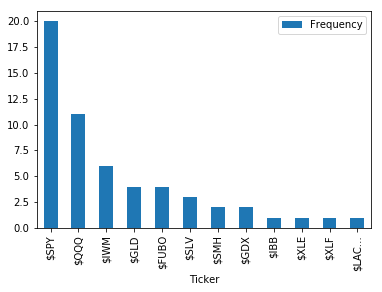

In [302]:
sorted_df.plot(kind='bar',x='Ticker',y='Frequency')

In [351]:
freq_df=ready_df.sort_values(by='Ticker').reset_index(drop=True)

In [352]:
freq_df

,Ticker,Frequency
0,FUBO,4
1,GDX,2
2,GLD,4
3,IBB,1
4,IWM,6
5,LAC…,1
6,QQQ,11
7,SLV,3
8,SMH,2
9,SPY,20


In [304]:
start = datetime.datetime(2021,2,1)
end = datetime.datetime(2021,2,9)

In [202]:
tickers=['SPY','QQQ','IWM','SMH','IBB','XLE','XLF','GLD','SLV','GDX','FUBO']

In [203]:
# iterate over each symbol
for i in tickers:  
    
    # print the symbol which is being downloaded
    print( str(tickers.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)
    



0 : SPY,1 : QQQ,2 : IWM,3 : SMH,4 : IBB,5 : XLE,6 : XLF,7 : GLD,8 : SLV,9 : GDX,10 : FUBO,

In [204]:
manystocks = yf.download(tickers, start = start, end = end, period = "1d")

[*********************100%***********************]  11 of 11 completed


In [205]:
manystocks

Adj Close                                                 \
                 FUBO        GDX         GLD         IBB         IWM   
Date                                                                   
2021-02-01  52.400002  35.680000  174.229996  162.690002  210.610001   
2021-02-02  48.459999  34.619999  172.110001  164.500000  213.610001   
2021-02-03  49.099998  34.610001  171.850006  163.880005  214.250000   
2021-02-04  51.049999  33.840000  168.149994  166.119995  218.619995   
2021-02-05  48.779999  34.610001  169.809998  169.050003  221.649994   
2021-02-08  46.320000  35.220001  171.520004  172.600006  227.309998   

                                                                      ...  \
                   QQQ        SLV         SMH         SPY        XLE  ...   
Date                                                                  ...   
2021-02-01  322.420013  26.760000  235.490005  376.230011  39.599998  ...   
2021-02-02  327.679993  24.540001  238.710007  381.549988  40.029999  ...   
2021-02-03  326.380005  24.930000  234.220001  381.850006  41.740002  ...   
2021-02-04  330.239990  24.480000  236.929993  386.190002  42.200001  ...   
2021-02-05  331.359985  24.950001  235.210007  387.709991  42.560001  ...   
2021-02-08  333.579987  25.389999  243.070007  390.510010  44.340000  ...   

              Volume                                                    \
                 GDX       GLD      IBB       IWM       QQQ        SLV   
Date                                                                     
2021-02-01  33084900   9105500  2473900  26375100  35646000  280615000   
2021-02-02  22560800   7221700  3561300  22773100  33930800  124327400   
2021-02-03  16858300   4658100  1943300  23923200  24824500   54593300   
2021-02-04  26075900  13736600  1746000  25400800  22350900   51529200   
2021-02-05  20311700   6536200  1869500  23320600  22710700   33644200   
2021-02-08  18754700   6887500  1830200  20831500  20462800   40683200   

                                                   
                SMH       SPY       XLE       XLF  
Date                                               
2021-02-01  2718900  75817600  30510700  41947400  
2021-02-02  4338500  64450700  31964500  54263000  
2021-02-03  3239900  52427100  37192800  46195200  
2021-02-04  2947900  47142600  24163900  63061800  
2021-02-05  2460200  48620300  24079700  38444200  
2021-02-08  4484600  38365200  31184100  48756300  

[6 rows x 66 columns]

In [206]:
# Group your data by the name of the tickers (and not by the indicators such as “Open”, “High”, etc..)
manystocks_groupby = yf.download(tickers, start = start, end = end, period = "1d", group_by= "Ticker")

[*********************100%***********************]  11 of 11 completed


In [208]:
manystocks_groupby

SLV                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2021-02-01  27.760000  27.980000  26.100000  26.760000  26.760000  280615000   
2021-02-02  25.540001  25.549999  24.410000  24.540001  24.540001  124327400   
2021-02-03  25.000000  25.100000  24.790001  24.930000  24.930000   54593300   
2021-02-04  24.379999  24.540001  24.059999  24.480000  24.480000   51529200   
2021-02-05  24.740000  25.139999  24.650000  24.950001  24.950001   33644200   
2021-02-08  25.510000  25.629999  25.370001  25.389999  25.389999   40683200   

                  GDX                                   ...         SMH  \
                 Open       High        Low      Close  ...         Low   
Date                                                    ...               
2021-02-01  36.029999  36.279999  35.080002  35.680000  ...  229.490005   
2021-02-02  34.880001  34.980000  34.450001  34.619999  ...  235.800003   
2021-02-03  34.700001  34.950001  34.439999  34.610001  ...  234.009995   
2021-02-04  33.689999  33.970001  33.230000  33.840000  ...  232.339996   
2021-02-05  34.110001  34.689999  33.900002  34.610001  ...  234.880005   
2021-02-08  35.270000  35.490002  34.900002  35.220001  ...  237.190002   

                                                    QQQ              \
                 Close   Adj Close   Volume        Open        High   
Date                                                                  
2021-02-01  235.490005  235.490005  2718900  318.109985  323.540009   
2021-02-02  238.710007  238.710007  4338500  325.480011  328.869995   
2021-02-03  234.220001  234.220001  3239900  329.820007  330.200012   
2021-02-04  236.929993  236.929993  2947900  327.820007  330.329987   
2021-02-05  235.210007  235.210007  2460200  331.220001  332.399994   
2021-02-08  243.070007  243.070007  4484600  333.100006  333.739990   

                                                          
                   Low       Close   Adj Close    Volume  
Date                                                      
2021-02-01  316.019989  322.420013  322.420013  35646000  
2021-02-02  325.309998  327.679993  327.679993  33930800  
2021-02-03  326.320007  326.380005  326.380005  24824500  
2021-02-04  326.459991  330.239990  330.239990  22350900  
2021-02-05  329.529999  331.359985  331.359985  22710700  
2021-02-08  331.410004  333.579987  333.579987  20462800  

[6 rows x 66 columns]

In [216]:
#Exatracting the adjusted close and calculating the return
many_stocks_daily_returns = manystocks['Adj Close'].pct_change()

In [217]:
many_stocks_daily_returns

,FUBO,GDX,GLD,IBB,IWM,QQQ,SLV,SMH,SPY,XLE,XLF
Date,,,,,,,,,,,
2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-02,-0.075191,-0.029709,-0.012168,0.011125,0.014244,0.016314,-0.082960,0.013674,0.014140,0.010859,0.024207
2021-02-03,0.013207,-0.000289,-0.001511,-0.003769,0.002996,-0.003967,0.015892,-0.018809,0.000786,0.042718,0.005659
2021-02-04,0.039715,-0.022248,-0.021530,0.013668,0.020397,0.011827,-0.018051,0.011570,0.011366,0.011021,0.022178
2021-02-05,-0.044466,0.022754,0.009872,0.017638,0.013860,0.003391,0.019199,-0.007259,0.003936,0.008531,0.000324
2021-02-08,-0.050430,0.017625,0.010070,0.021000,0.025536,0.006700,0.017635,0.033417,0.007222,0.041823,0.012949


In [280]:
#droppin null values
many_stocks_daily_returns.dropna()

,FUBO,GDX,GLD,IBB,IWM,QQQ,SLV,SMH,SPY,XLE,XLF
Date,,,,,,,,,,,
2021-02-02,-0.075191,-0.029709,-0.012168,0.011125,0.014244,0.016314,-0.082960,0.013674,0.014140,0.010859,0.024207
2021-02-03,0.013207,-0.000289,-0.001511,-0.003769,0.002996,-0.003967,0.015892,-0.018809,0.000786,0.042718,0.005659
2021-02-04,0.039715,-0.022248,-0.021530,0.013668,0.020397,0.011827,-0.018051,0.011570,0.011366,0.011021,0.022178
2021-02-05,-0.044466,0.022754,0.009872,0.017638,0.013860,0.003391,0.019199,-0.007259,0.003936,0.008531,0.000324
2021-02-08,-0.050430,0.017625,0.010070,0.021000,0.025536,0.006700,0.017635,0.033417,0.007222,0.041823,0.012949


In [334]:
mean_pct_change=many_stocks_daily_returns.mean()

In [335]:
pct_chnage_df=pd.DataFrame(mean_pct_change)
pct_chnage_df

,0
FUBO,-0.023433
GDX,-0.002373
GLD,-0.003053
IBB,0.011933
IWM,0.015407
QQQ,0.006853
SLV,-0.009657
SMH,0.006518
SPY,0.007490
XLE,0.022990


In [336]:
pct_chnage_df.reset_index(inplace=True)

In [337]:
df_new = pct_chnage_df.rename(columns={'index': 'Ticker'})
df_new

,Ticker,0
0,FUBO,-0.023433
1,GDX,-0.002373
2,GLD,-0.003053
3,IBB,0.011933
4,IWM,0.015407
5,QQQ,0.006853
6,SLV,-0.009657
7,SMH,0.006518
8,SPY,0.007490
9,XLE,0.022990


In [341]:
pct_df=df_new.sort_values('Ticker')


In [342]:
pct_df

,Ticker,0
0,FUBO,-0.023433
1,GDX,-0.002373
2,GLD,-0.003053
3,IBB,0.011933
4,IWM,0.015407
5,QQQ,0.006853
6,SLV,-0.009657
7,SMH,0.006518
8,SPY,0.007490
9,XLE,0.022990


In [353]:
#Correlation between dataframe
comb_df=pd.concat([freq_df,pct_df], axis=1,ignore_index=True,sort=True)

In [357]:
comb_df_final=comb_df.rename(columns={0:'Ticker',1:'Frequency',2:'Ticker',3:'Avg Return'})

In [358]:
comb_df_final

,Ticker,Frequency,Ticker,Avg Return
0,FUBO,4,FUBO,-0.023433
1,GDX,2,GDX,-0.002373
2,GLD,4,GLD,-0.003053
3,IBB,1,IBB,0.011933
4,IWM,6,IWM,0.015407
5,LAC…,1,QQQ,0.006853
6,QQQ,11,SLV,-0.009657
7,SLV,3,SMH,0.006518
8,SMH,2,SPY,0.007490
9,SPY,20,XLE,0.022990


In [359]:
comb_df_final.corr()

,Frequency,Avg Return
Frequency,1.000000,0.230186
Avg Return,0.230186,1.000000


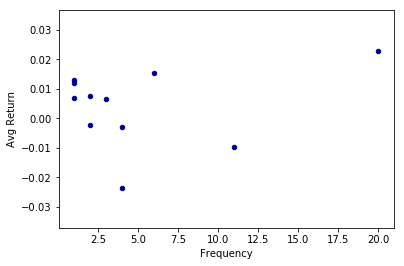

In [362]:
comb_df_final.plot.scatter(x='Frequency',y='Avg Return',c='DarkBlue')